In [1]:
import numpy as np
import pandas as pd
import lvm_read
import os
#from Pickle_Rick import *
from IPython.display import clear_output
import warnings
from termcolor import colored
from ipywidgets import interactive, widgets
import gas_dynamics as gd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Setting plotting parameters
#plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24) 

fs_lab = 28
fs_leg = 22

In [3]:
#path = r'E:\2. Everything I dont wanna organize\FST Data'
#files = os.listdir(path)
#os.chdir(path)

In [4]:
#FST_summary = 'FST Overview.xlsx'
#if os.path.exists(FST_summary) == True:
#    master_file = pd.read_excel(FST_summary)

In [5]:
# Funtion to scale the profiles

# I did not write this function myself
def scale_func(x, out_range = (0, 1)):
    domain = x.min(), x.max()
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

In [6]:
# Path to file
file = r'C:\Users\Hypersonic Lab\Documents\Results\FST_413_NASA_OPO_FreeFlight.lvm'

print('Please Input Full System Test Number (Number only):')
fst_num = input()
print('Please Insert Test Description:')
desc = input()
print('Was PT9 used? If so, describe location.')
pt9_loc = input()
clear_output()
print('Was Buffer Tank used? (Y/N)')
Buffer_tank = input()
clear_output()
if len(fst_num) == 0 or len(desc) == 0 or len(pt9_loc) == 0:
    print(colored('PLEASE ENTER INFORMATION!!!', 'red'))
    print('Please Input Full System Test Number (Number only):')
    fst_num = input()
    print('Please Insert Test Description:')
    desc = input()
    print('Was PT9 used? If so, describe location.')
    pt9_loc = input()
    clear_output()
    print('Was Buffer Tank used? (Y/N)')
    Buffer_tank = input()
    clear_output()
    if len(fst_num) == 0 or len(desc) == 0 or len(pt9_loc) == 0:
        print(colored('PLEASE ENTER INFORMATION!!!', 'red'))
        print('Please Input Full System Test Number (Number only):')
        fst_num = input()
        print('Please Insert Test Description:')
        desc = input()
        print('Was PT9 used? If so, describe location.')
        pt9_loc = input()
        clear_output()
        print('Was Buffer Tank used? (Y/N)')
        Buffer_tank = input()
        clear_output()


DT_PTs = ['PT_1', 'PT_2', 'PT_3', 'PT_4', 'PT_5','PT_6']
if Buffer_tank == 'N':
    DT_TCs = ['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5', 'TC_6','TC_7', 'TC_8', 'TC_9', 'TC_10', 'TC_11'] # 'TC_12'
else:
    DT_TCs = ['TC_8', 'TC_11']
S_PTs = set(DT_PTs)
S_TCs = set(DT_TCs)

win = 10

# Load data into dataframe
lvm = lvm_read.read(file, dump_file = False)
data0 = pd.DataFrame.from_dict(lvm[0]['data'])
data = pd.DataFrame(data0[0].tolist())
data.columns = lvm[0]['Channel names'] # Pull column names from lvm

# Find which DT PTs and TCs were actually used in test
L2 = lvm[0]['Channel names']
[i for i in DT_PTs if i in L2]
S2 = set(L2)
DT_PT = list(S_PTs.intersection(S2))
[i for i in DT_TCs if i in L2]
DT_TC = list(S_TCs.intersection(S2))
# Find the diaphragm burst pressure
burst_pressure = data[DT_PT].rolling(win, center=True).mean().max().mean() + 16.7
print('The burst presssure was', round(burst_pressure,1), 'psia')

# Find the max temperature and set heated = Y/N
max_temp = data[DT_TC].max().mean()
print('The run temperature was', round(max_temp,1), 'K')
if max_temp >= 350:
    heated = 'Y'
else:
    heated = 'N'

The burst presssure was 103.5 psia
The run temperature was 573.2 K


In [7]:
DT_TCs

['TC_8', 'TC_11']

In [8]:
data.head()

,X_Value,Trigger,PT_8,PT_Vacuum Tank,PT_1,PT_2,PT_3,PT_4,PT_6,PT_1 (Filtered),...,TC_9,TC_10,TC_11,TC_12,TC_11 1,Untitled,MKS,Kulite,Buffer Tank (Filtered),Comment
0,0.0000,0.048518,-3.478993,0.221815,6.670755,5.840241,5.425609,4.201973,5.756375,22.173022,...,694.626773,700.36481,323.860727,294.866496,356.443354,0.010003,0.063018,-0.350517,969.192358,NaN
1,0.0002,0.048518,-3.484519,0.371432,0.285171,9.579929,2.697816,5.493172,5.469299,22.172019,...,694.626773,700.36481,323.860727,294.866496,356.443354,NaN,0.062986,-0.349961,969.173594,NaN
2,0.0004,0.048518,-3.485747,0.193121,7.101244,5.049154,4.851337,6.425704,5.899914,22.170798,...,694.626773,700.36481,323.860727,294.866496,356.443354,NaN,0.063013,-0.348937,969.181592,NaN
3,0.0006,0.048518,-3.484519,0.215666,-0.504059,8.860758,4.635984,6.497437,5.325760,22.169900,...,694.626773,700.36481,323.860727,294.866496,356.443354,NaN,0.062955,-0.347858,969.171133,NaN
4,0.0008,0.048518,-3.489431,0.014810,9.397185,4.689568,6.143449,5.421438,4.320993,22.169361,...,694.626773,700.36481,323.860727,294.866496,356.443354,NaN,0.063016,-0.347376,969.168826,NaN


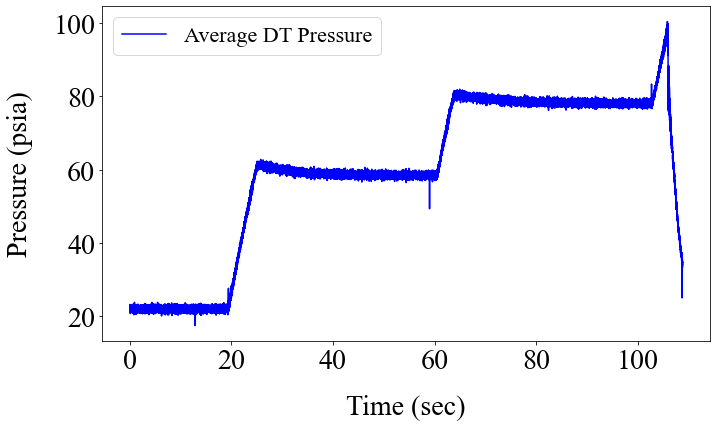

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,6)
fig.tight_layout(pad=3.0)

plt.rc('font', family='times new roman') #specify the default font family to be "serif"
plt.plot(data.X_Value, data[DT_PT].rolling(win, center=True).mean().mean(axis = 1) + 16.7, 'b', label = 'Average DT Pressure')
#p1 = plt.plot(data.X_Value, data.TC_11, 'b', label = 'DT Temerature Probe 2')



plt.xlabel('Time (sec)', fontsize = fs_lab, labelpad = 20)
plt.ylabel('Pressure (psia)', rotation = 90, fontsize = fs_lab, labelpad = 20)
plt.xticks(fontsize = fs_lab)
plt.yticks(fontsize = fs_lab)
plt.legend(fontsize = fs_leg)

plt.legend(fontsize = fs_leg)
save_path = r'I:\COMBS\1. Projects Folder\1. UTSA M7 Wind Tunnel\8. Test Results\Full System\247. Full System Test 247 03232022'

#plt.savefig(os.path.join(save_path, fig_title), dpi=300, bbox_inches='tight')

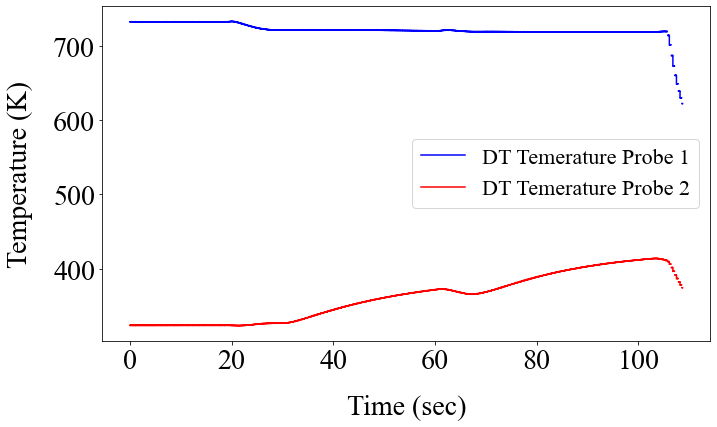

In [10]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,6)
fig.tight_layout(pad=3.0)

plt.rc('font', family='times new roman') #specify the default font family to be "serif"
plt.plot(data.X_Value, data.TC_8, 'b', label = 'DT Temerature Probe 1')
p1 = plt.plot(data.X_Value, data.TC_11, 'r', label = 'DT Temerature Probe 2')



plt.xlabel('Time (sec)', fontsize = fs_lab, labelpad = 20)
plt.ylabel('Temperature (K)', rotation = 90, fontsize = fs_lab, labelpad = 20)
plt.xticks(fontsize = fs_lab)
plt.yticks(fontsize = fs_lab)
plt.legend(fontsize = fs_leg)

plt.legend(fontsize = fs_leg)
save_path = r'I:\COMBS\1. Projects Folder\1. UTSA M7 Wind Tunnel\8. Test Results\Full System\247. Full System Test 247 03232022'

#plt.savefig(os.path.join(save_path, fig_title), dpi=300, bbox_inches='tight')

In [11]:
# Locate the diaphram burst via gradient

f = 5000

grad = np.gradient(data.PT_7.rolling(100, center=True).mean())
grad = grad[~np.isnan(grad)]
start = 0#int(np.where(grad == grad.max())[0])
if start/f < 120:
    start = int(np.where(grad == grad[int(2*start)::].max())[0])

unstart = start + 4000

time = 1000*np.arange(0,(unstart-start)/f, 1/f)

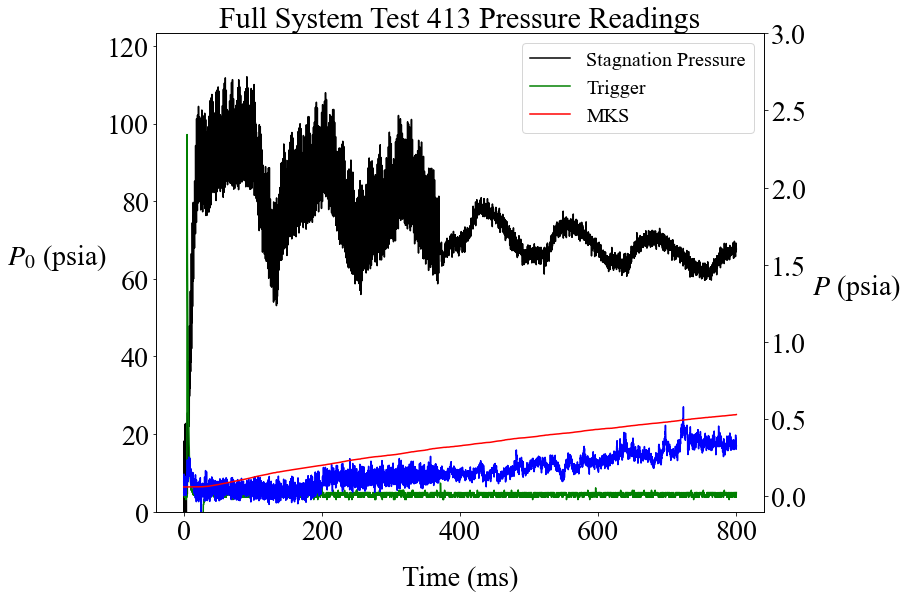

In [12]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
fig.tight_layout(pad=3.0)

plt.rc('font', family='times new roman') #specify the default font family to be "serif"
p1 = plt.plot(time, data.PT_7[start:unstart], 'k', label = 'Stagnation Pressure')

plt.ylim(0,1.1*data.PT_7[start:unstart].max())


plt.xlabel('Time (ms)', fontsize = fs_lab, labelpad = 20)
plt.ylabel(r'$P_0 $ (psia)', rotation = 0, fontsize = fs_lab, labelpad = 50)
plt.xticks(fontsize = fs_lab)
plt.yticks(fontsize = fs_lab)
plt.legend(fontsize = fs_leg)

ax2 = ax1.twinx()

p2 = plt.plot(time,data.Trigger[start:unstart]*.5,'g', label = 'Trigger')
#plt.plot(time, scale_func(data.Trigger[start:unstart], out_range = (data.PT_8[start:unstart].min(),data.PT_8[start:unstart].max())), '.r',label = 'Trigger')
#plt.plot(time, data.PT_8[start:unstart], '--y',label = 'PT_8 , psia')
plt.plot(time, data.PT_9[start:unstart], 'b',label = 'PT_9, psia')
p3 = plt.plot(time, data.MKS[start:unstart], 'r',label = 'MKS')

plt.yticks(fontsize = fs_lab)
#plt.ylim(data.PT_8[start:unstart].min(),2*data.PT_8[start:unstart].max())

plt.ylabel(r'$P$ (psia)', rotation = 0, fontsize = fs_lab, labelpad = 50)

plot_title = 'Full System Test ' + fst_num + ' Pressure Readings'
fig_title = 'Full System Test ' + fst_num + '.tif'

plt.title(plot_title, fontsize = fs_lab + 2)

#plt.xlim(30,100) # 80 ms of data
#plt.xlim(0,100)

plt.ylim(-0.1,3)

# Combining labels
lns = p1+p2+p3
labs = [l.get_label() for l in lns]

ax1.legend(lns, labs, fontsize =  fs_leg-2)

save_path = r'I:\COMBS\1. Projects Folder\1. UTSA M7 Wind Tunnel\8. Test Results\Full System\247. Full System Test 247 03232022'

#plt.savefig(os.path.join(save_path, fig_title), dpi=300, bbox_inches='tight')

In [13]:
# Create Slider to easily find the first steady state pass
slider =  widgets.IntRangeSlider(
    value=[time.min(), time.min() + 200],
    min=time.min(),
    max=time.min()+200,
    step=1,
    description='Steady State Window',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

def pf(n):

    global fssp_start
    fssp_start = n[0]
    
    global fssp_end
    fssp_end = n[1]
    
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10,6)
    fig.tight_layout(pad=3.0)

    p1 = plt.plot(time, data.PT_7[start:unstart], 'k', label = 'Stagnation Pressure')

    plt.ylim(0,1.3*data.PT_7[start:unstart].max())


    plt.xlabel('Time (ms)', fontsize = fs_lab, labelpad = 20)
    plt.ylabel(r'$P_0 $ (psia)', rotation = 0, fontsize = fs_lab, labelpad = 50)
    plt.xticks(fontsize = fs_lab)
    plt.yticks(fontsize = fs_lab)
    plt.legend(fontsize = fs_leg)

    ax2 = ax1.twinx()

    p2 = plt.plot(time, data.PT_9[start:unstart], 'b',label = 'PT_9, psia')

    plt.yticks(fontsize = fs_lab)

    plt.ylabel(r'$P$ (psia)', rotation = 0, fontsize = fs_lab, labelpad = 50)

    plot_title = 'Full System Test ' + fst_num + ' Pressure Readings'
    fig_title = 'Full System Test ' + fst_num + '.tif'

    plt.title(plot_title, fontsize = fs_lab + 2)

    plt.xlim(n[0],n[1])

    plt.ylim(-0.1,3)

    # Combining labels
    lns = p1+p2
    labs = [l.get_label() for l in lns]

    ax1.legend(lns, labs, fontsize =  fs_leg-2)

interactive_plot= interactive(pf,n = slider)
interactive_plot

interactive(children=(IntRangeSlider(value=(0, 200), continuous_update=False, description='Steady State Window…

In [14]:
before = 2 # s
sf = 5000 # Hz
offset11 = data.MKS[fssp_start-(before*sf):fssp_end-(before*sf)].mean() - data.PT_9[fssp_start-(before*sf):fssp_end-(before*sf)].mean() 

In [15]:
# Reynolds number
fssp_start = start + int(fssp_start*f/1000)
fssp_end = start + int(fssp_end*f/1000)
before = 2 # s

gamma = 1.4
R = 287
P0 =  (data.PT_7[fssp_start:fssp_end].mean()) * 6894.76  # Stagnation presssure, Pa
P = data.PT_9[fssp_start:fssp_end].mean() * 6894.76  # Static Pressure, Pa
M = gd.stagnation_pressure(pressure=P, stagnation_pressure=P0)# Mach number
T0 = data.TC_8[fssp_start-(before*sf):fssp_end-(before*sf)].max() # Stagnation temperature, Kelvin
T = T0*gd.stagnation_temperature_ratio(mach = M) # Freestream static temp
rho0 = P0/(R*T0) # Stagnation Density
rho = rho0 * gd.stagnation_density_ratio(mach = M) # freestream static density
u = M*np.sqrt(gamma*R*T) # freestream velocity, m/s

# constants
mu0 = 0.00001827 # Pa s
Tr = 291.15 # Kelvin
C = 120 # Kelvin

# Sutherlands law
nu = mu0*(T/Tr)**(3/2)*(Tr+C)/(C+T)

# Calculate the Renolds number
Re = rho*u/nu

In [16]:
# Creating Matrix with data output
from datetime import date
dataout = pd.DataFrame(np.zeros((1,1)), columns = ['FST Number'])
dataout.iloc[0,0] = fst_num 
dataout['Date'] = date.today().strftime("%m/%d/%Y")
dataout['Burst Pressure (psia)'] = round(burst_pressure,1)
dataout['Burst Temp (K)'] =  round(data.TC_8[fssp_start-(before*sf):fssp_end-(before*sf)].max(),1)#round(max_temp,1)
dataout['P0 (psia)'] =  data.PT_7[fssp_start:fssp_end].mean()
dataout['P (psia)'] = data.PT_9[fssp_start:fssp_end].mean() #+ offset11
dataout['Mach Number'] = gd.stagnation_pressure(pressure=dataout['P (psia)'][0], stagnation_pressure=dataout['P0 (psia)'][0])
dataout['Reynolds Number'] = Re

# track_log = pd.read_excel('Results.xlsx')
# track_log.drop(track_log.columns[0],axis = 1)
# track_log = track_log.append(dataout)
# track_log.to_excel('Results.xlsx',index = False)
# track_log
dataout

,FST Number,Date,Burst Pressure (psia),Burst Temp (K),P0 (psia),P (psia),Mach Number,Reynolds Number
0,413,11/01/2022,103.5,718.9,91.718799,0.037516,6.438612,2.536458e+06


http://www.dept.aoe.vt.edu/~devenpor/aoe3114/calc.html

In [17]:
log_file = 'NASA ODPO Test Conditions.xlsx'
track_log = pd.read_excel(log_file)
track_log.drop(track_log.columns[0],axis = 1)
track_log = track_log.append(dataout)
track_log.to_excel(log_file,index = False)
track_log

,FST Number,Date,Burst Pressure (psia),Burst Temp (K),P0 (psia),P (psia),Mach Number,Reynolds Number
0,401,10/31/2022,109.6,320.7,98.648321,0.042417,6.387300,5.929857e+06
1,402,10/31/2022,101.1,317.5,91.665138,0.042460,6.311392,1.057948e+07
2,403,10/31/2022,104.1,320.0,92.926213,0.042143,6.332911,1.050412e+07
3,404,10/31/2022,103.0,318.4,92.371931,0.038684,6.414365,1.025864e+07
4,405,10/31/2022,110.1,316.1,97.539664,0.039993,6.436145,1.089342e+07
5,406,10/31/2022,102.4,313.4,89.665275,0.044334,6.245455,1.082026e+07
6,407,10/31/2022,95.8,318.6,85.770657,0.033537,6.485205,9.301271e+06
7,408,10/31/2022,116.9,319.7,105.640243,0.038529,6.557669,1.112212e+07
8,410,10/31/2022,116.6,633.3,104.589947,0.037407,6.578137,3.380537e+06
9,411,10/31/2022,103.0,659.4,80.607009,0.032879,6.441495,2.560762e+06


In [38]:
track_log.describe()

,Burst Pressure (psia),Burst Temp (K),P0 (psia),P (psia),Mach Number,Reynolds Number
count,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,106.260000,383.710000,93.942440,0.039238,6.419007,8.535046e+06
std,6.854715,138.575984,7.866134,0.003838,0.105342,3.302187e+06
min,95.800000,313.400000,80.607009,0.032879,6.245455,2.560762e+06
25%,102.550000,317.725000,90.165241,0.037688,6.346508,6.772711e+06
50%,103.550000,319.150000,92.649072,0.039338,6.425255,1.038138e+07
75%,109.975000,320.525000,98.371157,0.042348,6.474277,1.076007e+07
max,116.900000,659.400000,105.640243,0.044334,6.578137,1.112212e+07
